# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [90]:
X,y,c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [91]:
df_blobs = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
    'y': y
})

In [92]:
df_centers = pd.DataFrame({
    'x1': c[:,0],
    'x2': c[:,1],

})

In [93]:
df_blobs

,x1,x2,y
0,0.067528,7.056402,2
1,1.149834,7.049259,2
2,6.148013,7.306123,0
3,1.152322,6.888324,2
4,-0.284543,7.279971,2
...,...,...,...
495,9.943077,-10.265522,3
496,-8.536249,-7.749583,1
497,-8.473834,-7.068381,1
498,-1.252417,6.716492,2


## Visualización de datos

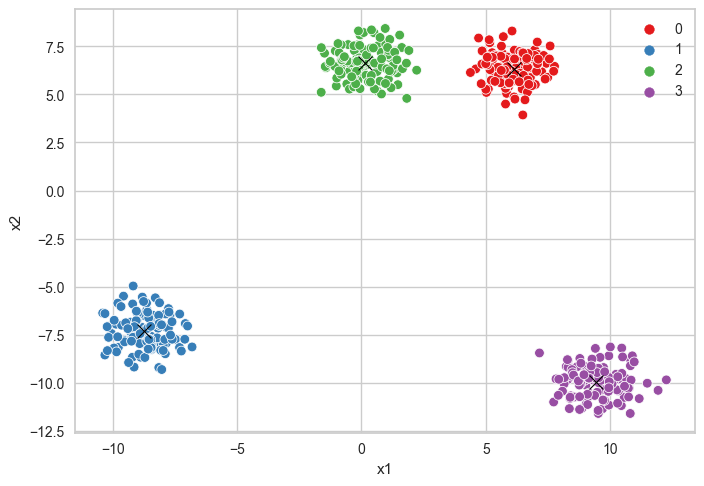

In [94]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='y', palette='Set1')
sns.scatterplot(data=df_centers, x='x1', y='x2', color='black', marker='x', s=100)
plt.show()

## Aplicando K-means

In [95]:
model = KMeans(n_clusters=4)
df_cluster = model.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = model.cluster_centers_
df_k_means_centers = pd.DataFrame({
    'x1': k_means_centers[:,0],
    'x2': k_means_centers[:,1],
})

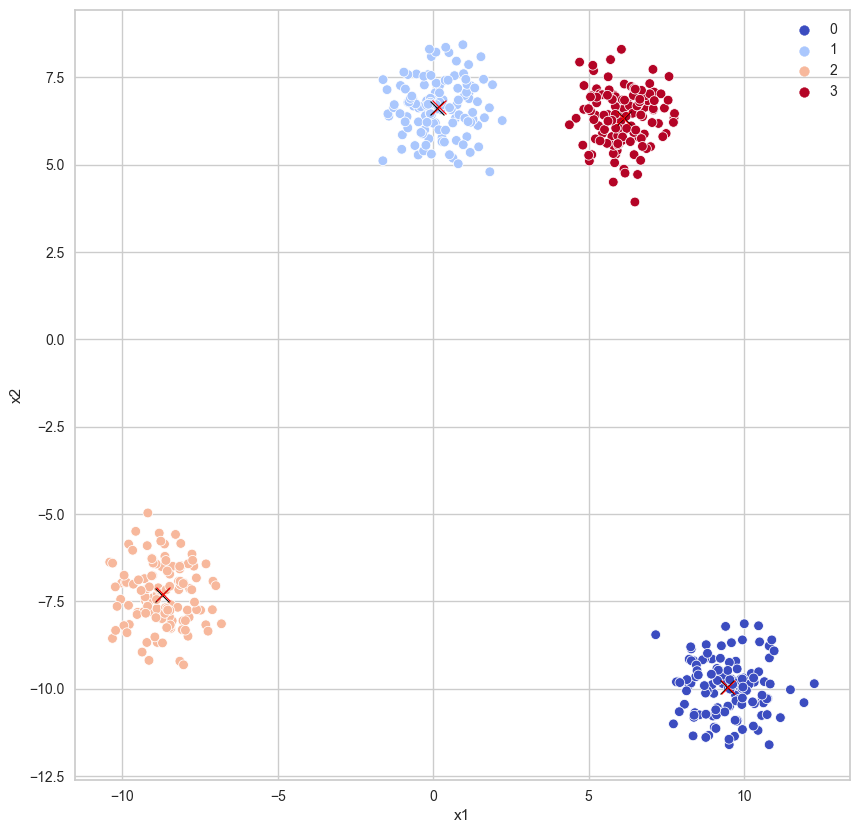

In [96]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1', y='x2', color='black', marker='x', s=100)
sns.scatterplot(data=df_k_means_centers, x='x1', y='x2', color='red', marker='x', s=100)
plt.show()


In [97]:
def visualizacion_cluster(k):
    model = KMeans(n_clusters=k)
    df_cluster = model.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = model.cluster_centers_
    df_k_means_centers = pd.DataFrame({
        'x1': k_means_centers[:,0],
        'x2': k_means_centers[:,1],
    })

    fig = plt.figure(figsize=(10,10))
    sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers, x='x1', y='x2', color='black', marker='x', s=100)
    sns.scatterplot(data=df_k_means_centers, x='x1', y='x2', color='red', marker='x', s=100)
    plt.show()


3


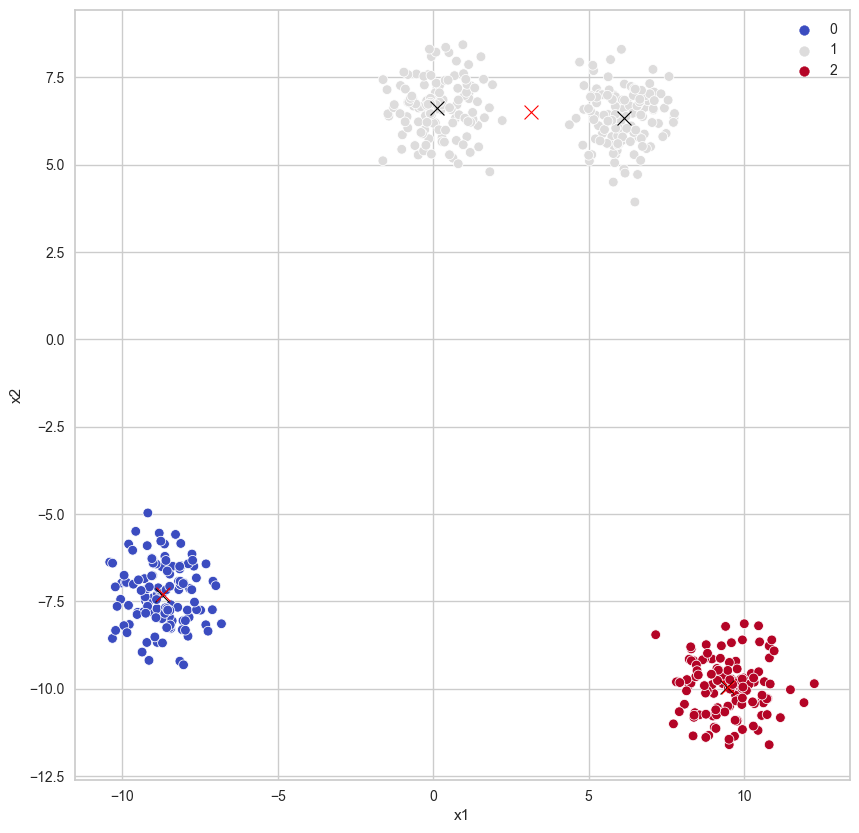

4


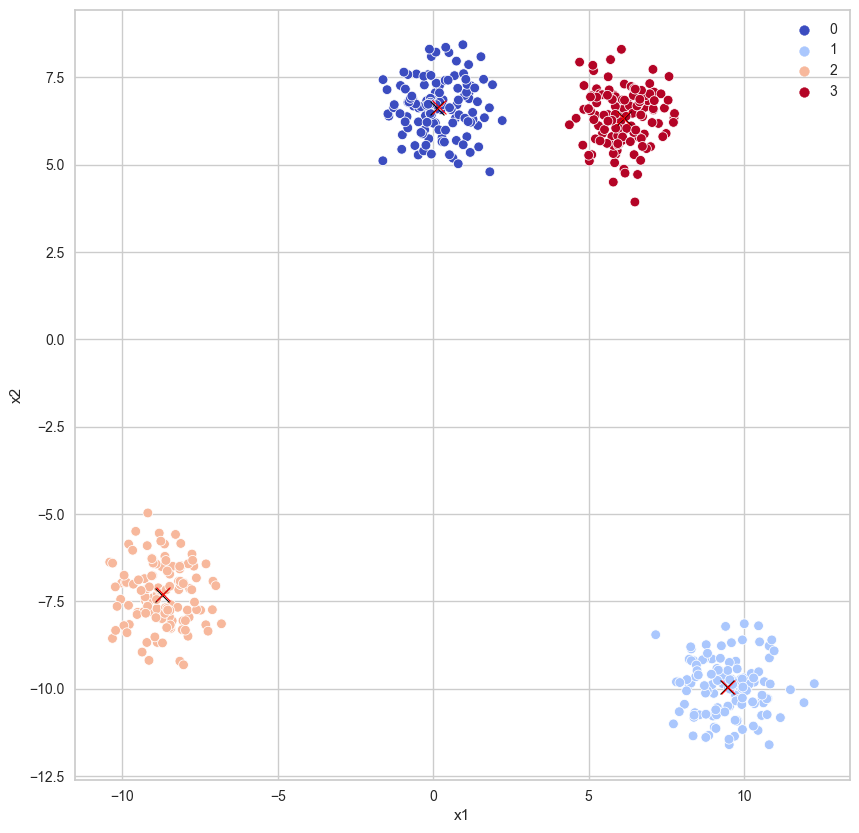

5


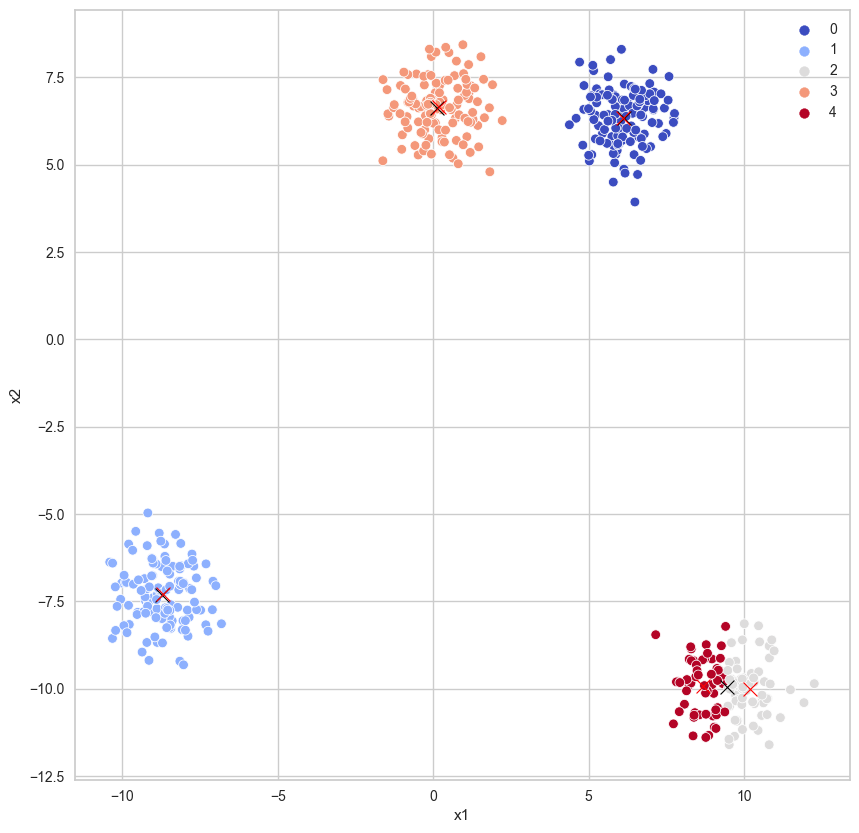

6


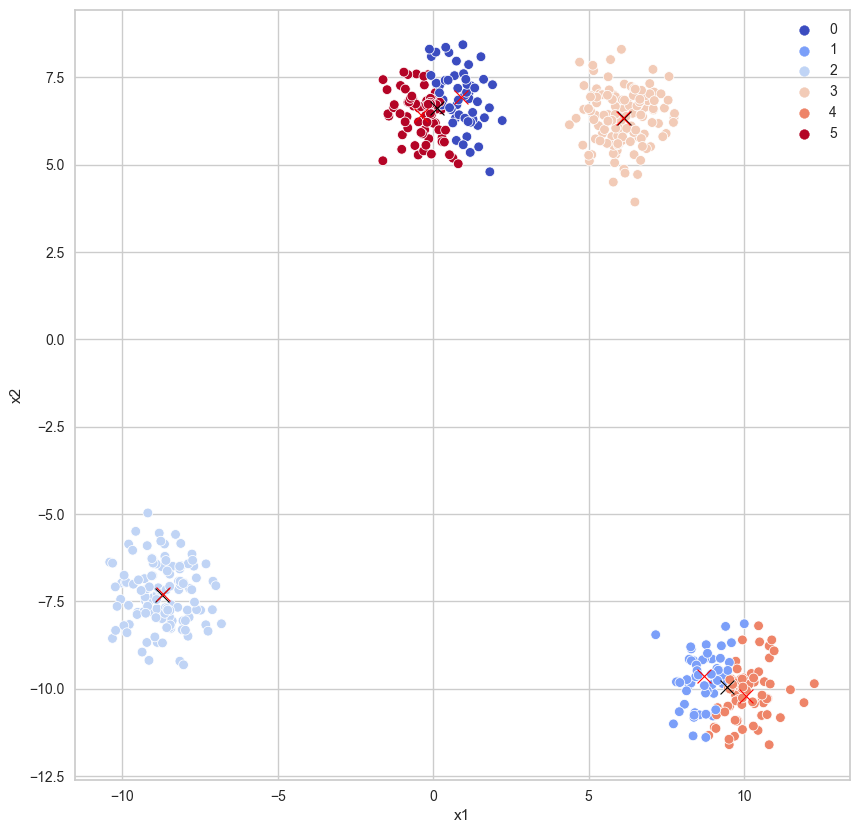

In [98]:
for _ in range(3,7):
    print(_)
    visualizacion_cluster(_)

## Encontrando el valor de K

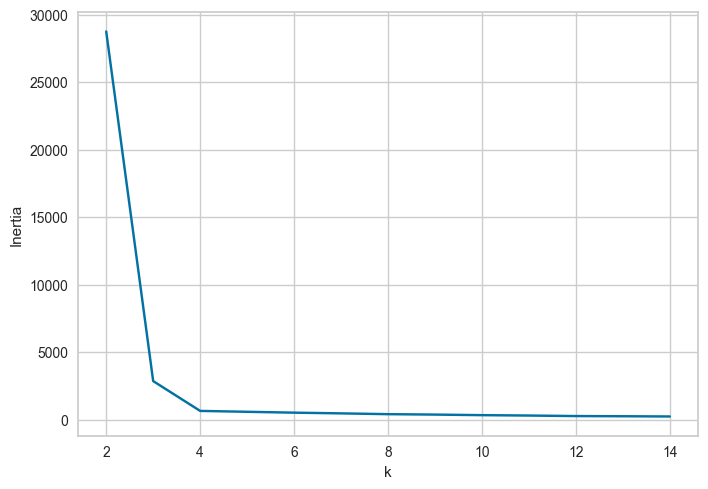

In [99]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    sum_of_squared_distances.append(model.inertia_)


plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


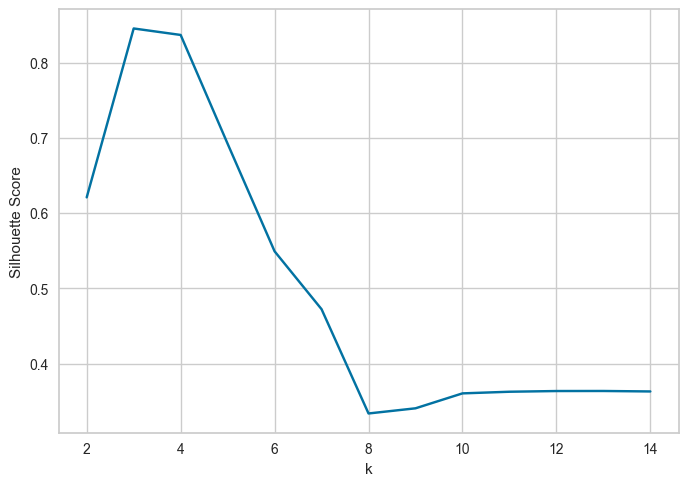

In [100]:
silhouette_scores = []
K = range(2,15)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    y= model.predict(X)
    silhouette_scores.append(silhouette_score(X, y))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

## Evaluando clusters con K-means

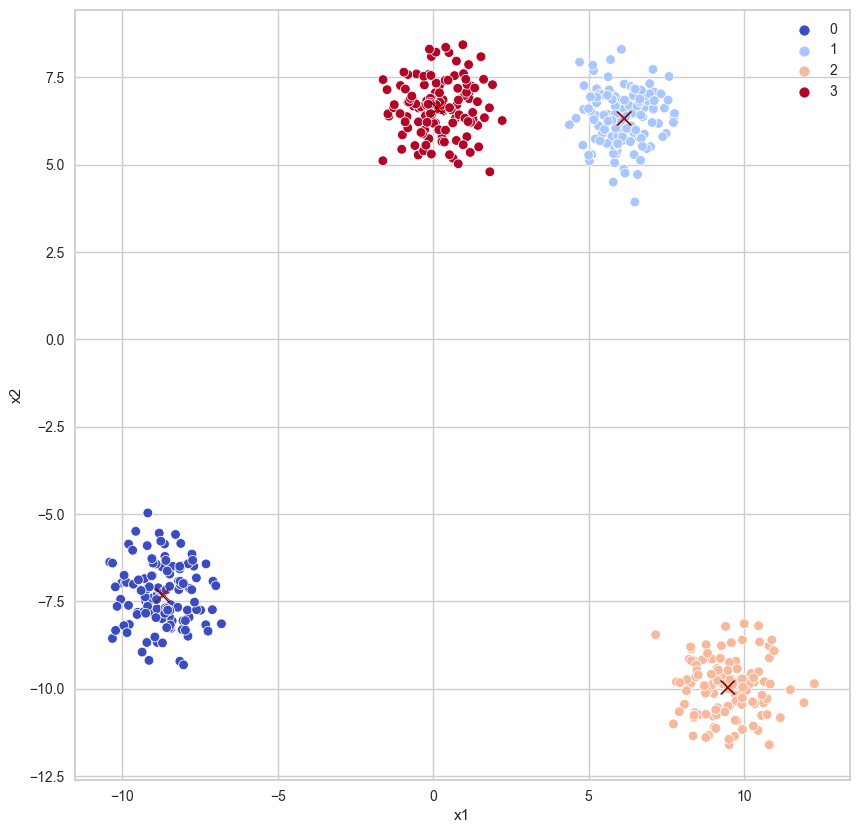

In [101]:
visualizacion_cluster(4)

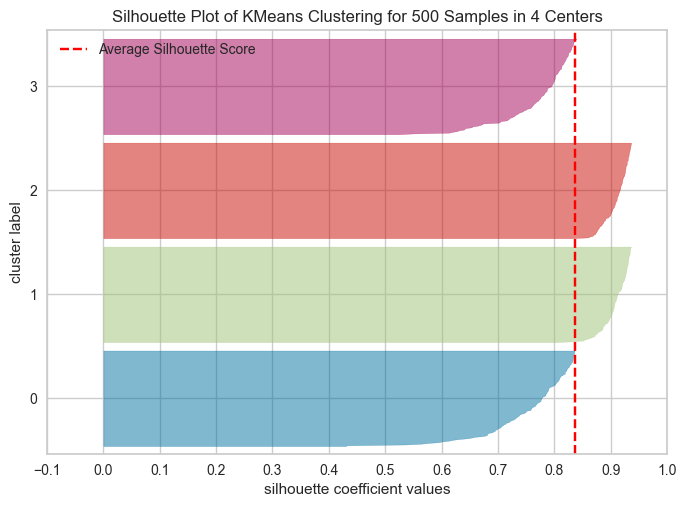

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 500 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [103]:
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

0.8365829391921599


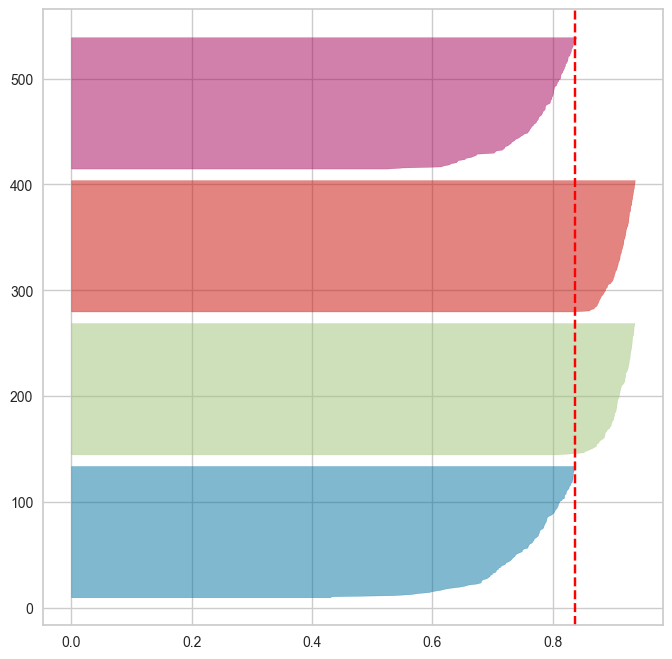

In [104]:
plt.figure(figsize=(8,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)
yc4 = km.predict(X)



print(silhouette_score(X,yc4))